In [1]:
#declare dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

In [2]:
#make csv's into variables
data = "USCS_OverviewMap.csv"
data2= "pollution_us_2010.csv"

In [3]:
#read csv's into pandas dataframes (extract)
lung_cancer = pd.read_csv(data)
pollution_data = pd.read_csv(data2)
#rename column so df's match for merge
lung_df = lung_cancer.rename(columns={'Area': 'State'})
lung_df.head()

,State,CancerType,Year,Sex,AgeAdjustedRate,CaseCount,Population
0,Utah,Lung and Bronchus,2016,Male and Female,25.1,652,3044321
1,New Mexico,Lung and Bronchus,2016,Male and Female,36.4,950,2085432
2,Arizona,Lung and Bronchus,2016,Male and Female,44.3,3886,6908642
3,California,Lung and Bronchus,2016,Male and Female,38.2,16177,39296476
4,Colorado,Lung and Bronchus,2016,Male and Female,40.2,2346,5530105


In [4]:
#transform/load data= pull needed col's and sort/avg
pollution_clean = pollution_data[['State', 'County', 'NO2 Units', 'NO2 Mean', 'O3 Units', 'O3 Mean', 'SO2 Units', 'SO2 Mean', 'CO Units', 'CO Mean']]
pollution_group = pollution_clean.groupby(['State'])
pollution_summary = pollution_group.mean()
pollution_summary.head()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
State,,,,
Arizona,15.916712,0.025903,1.047033,0.365168
Arkansas,10.004749,0.027650,1.292494,0.454634
California,12.247269,0.025669,0.720866,0.344747
Colorado,16.171138,0.022955,1.028090,0.365696
Connecticut,9.739028,0.027474,0.949623,0.279957


In [5]:
#merge 2 df's to get data ready for machine learning
merge = pd.merge(lung_df, pollution_summary, how='inner', on='State')
merge.head()

,State,CancerType,Year,Sex,AgeAdjustedRate,CaseCount,Population,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
0,Arizona,Lung and Bronchus,2016,Male and Female,44.3,3886,6908642,15.916712,0.025903,1.047033,0.365168
1,California,Lung and Bronchus,2016,Male and Female,38.2,16177,39296476,12.247269,0.025669,0.720866,0.344747
2,Colorado,Lung and Bronchus,2016,Male and Female,40.2,2346,5530105,16.171138,0.022955,1.028090,0.365696
3,Idaho,Lung and Bronchus,2016,Male and Female,47.8,920,1680026,9.397005,0.026446,0.323220,0.179643
4,Nevada,Lung and Bronchus,2016,Male and Female,50.5,1724,2939254,22.342167,0.018229,0.430436,0.289673


In [6]:
#assign variables X (data) and y (target)
X = merge[["CO Mean", "NO2 Mean", "O3 Mean", "SO2 Mean", "Population"]]
y = merge["CaseCount"].values.reshape(-1, 1)

In [7]:
#split data into training/testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
#import machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#create scaler models and fit data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
#transform train/test data using scalers
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
#create linearRegress model and fit to scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

C:\Users\Nicole\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nicole\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Nicole\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Nicole\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\Nicole\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarni

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

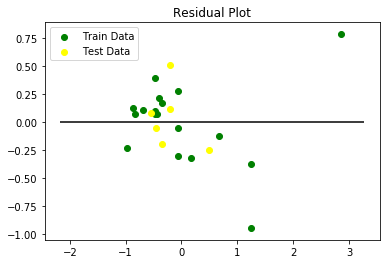

In [9]:
#Make predictions with X_test_scaled data
predictions = model.predict(X_test_scaled)
#fit the train data to our model
model.fit(X_train_scaled, y_train_scaled)
#plot the train vs test data for comparison of residuals
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="green", label="Train Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="yellow", label="Test Data")
plt.legend()
plt.hlines(y=0, xmin=X_train_scaled.min(), xmax=X_train_scaled.max())
plt.title("Residual Plot")
plt.savefig("./images/residual_plot")

In [12]:
#add new column of rate per state
merge["CancerRate"] = (merge["CaseCount"] / merge["Population"]) *100
merge.head()

,State,CancerType,Year,Sex,AgeAdjustedRate,CaseCount,Population,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,CancerRate
0,Arizona,Lung and Bronchus,2016,Male and Female,44.3,3886,6908642,15.916712,0.025903,1.047033,0.365168,0.056248
1,California,Lung and Bronchus,2016,Male and Female,38.2,16177,39296476,12.247269,0.025669,0.720866,0.344747,0.041167
2,Colorado,Lung and Bronchus,2016,Male and Female,40.2,2346,5530105,16.171138,0.022955,1.028090,0.365696,0.042422
3,Idaho,Lung and Bronchus,2016,Male and Female,47.8,920,1680026,9.397005,0.026446,0.323220,0.179643,0.054761
4,Nevada,Lung and Bronchus,2016,Male and Female,50.5,1724,2939254,22.342167,0.018229,0.430436,0.289673,0.058654


In [13]:
#make & sort new df for visualization
summary = merge[["State", "CancerRate"]]
sorted_df = summary.sort_values(by='CancerRate', ascending=False)
sorted_df.head()

,State,CancerRate
19,Maine,0.109229
14,Arkansas,0.096512
20,New Hampshire,0.084943
17,Indiana,0.083916
22,Ohio,0.083045


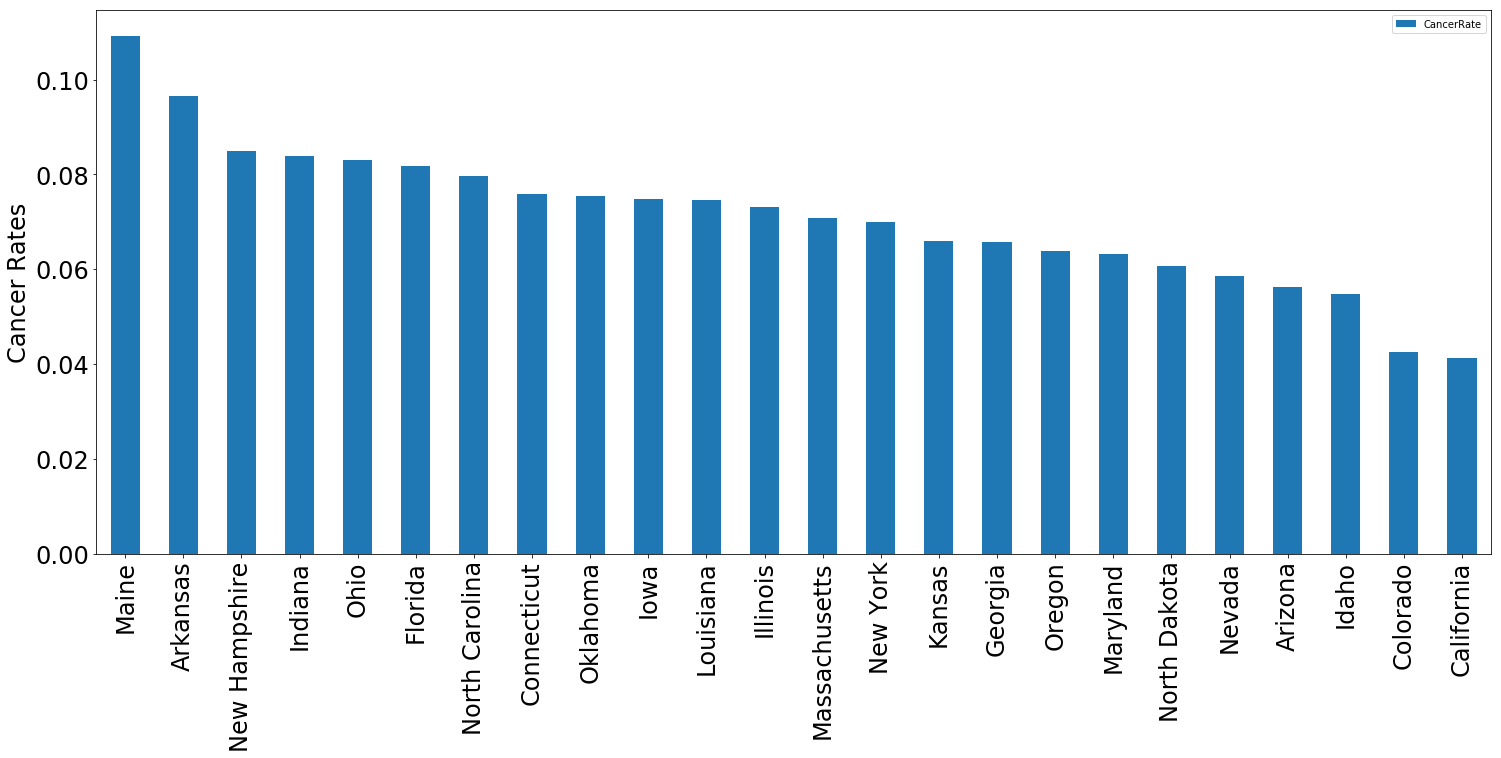

In [14]:
#plot graph to show the highest to lowest cancer rate by state
cancer_rate_plot = sorted_df.plot(kind="bar", figsize=(25,10))
cancer_rate_plot.set_xticklabels(sorted_df["State"])
cancer_rate_plot.set_ylabel("Cancer Rates", size=24)
plt.tick_params(labelsize=24)
plt.savefig("./images/StateCancerRates")